In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [3]:
data = pd.read_csv('google_stock_data.csv')


In [4]:
data = data['Close'].values

In [5]:
# Scale the data to be between 0 and 1
scaler = MinMaxScaler()
data = scaler.fit_transform(data.reshape(-1, 1))

In [6]:
# Create sequences of 60 consecutive stock prices as features and the 61st price as the label
X = []
y = []
for i in range(60, len(data)):
    X.append(data[i-60:i, 0])
    y.append(data[i, 0])
X, y = np.array(X), np.array(y)

# Reshape X to be of shape (samples, time steps, features) which is required for LSTM
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

In [7]:
# Create sequences of 60 consecutive stock prices as features and the 61st price as the label
X = []
y = []
for i in range(60, len(data)):
    X.append(data[i-60:i, 0])
    y.append(data[i, 0])
X, y = np.array(X), np.array(y)

# Reshape X to be of shape (samples, time steps, features) which is required for LSTM
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(Dropout(0.94))  # Add dropout after the first LSTM layer
model.add(LSTM(units=50))
model.add(Dropout(0.94))  # Add dropout after the second LSTM layer
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X, y, epochs=5, batch_size=32)

Epoch 1/5


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.1197
Epoch 2/5
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0519
Epoch 3/5
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0376
Epoch 4/5
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0356
Epoch 5/5
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0246


In [11]:
import matplotlib.pyplot as plt

110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


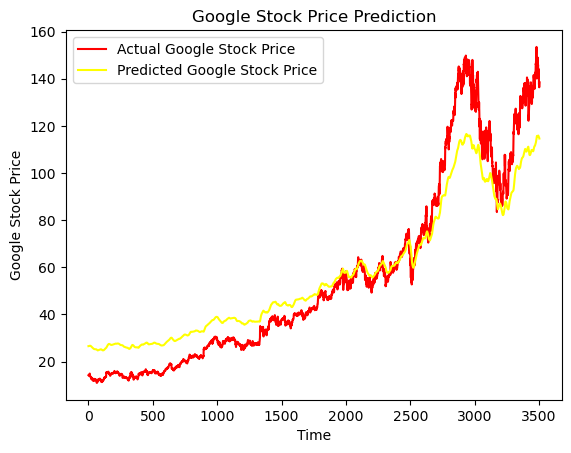

In [12]:
# Generate predictions
predicted_prices = model.predict(X)
predicted_prices = scaler.inverse_transform(predicted_prices)  # Undo scaling

# Get the actual prices (also undo scaling)
actual_prices = scaler.inverse_transform(y.reshape(-1, 1))

# Plot the actual vs predicted prices
plt.plot(actual_prices, color='red', label='Actual Google Stock Price')
plt.plot(predicted_prices, color='yellow', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()